In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Dataset: S&P 500 5 year prices (2013 to 2018)

Download `all_stocks_5yr.csv` from https://www.kaggle.com/camnugent/sandp500/data or produce a more recent dump using the code on https://github.com/CNuge/kaggle-code/blob/master/stock_data/getSandP.py

In [6]:
stocks = pd.read_csv('all_stocks_5yr.csv')
stocks.count()

date      619040
open      619029
high      619032
low       619032
close     619040
volume    619040
Name      619040
dtype: int64

In [4]:
stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## Correlations of variables

Pandas can compute the (Pearson) correclation coefficients of all variables.

Cleary, prices for a particular stock of the same day are highly correlated (`0.99`), because today's opening price is a better indicator for today's closing price than the price of any other stock from a random day in the last 5 years.

Stock price and volume are slightly negatively correlated (`-0.14`). This is not perfectly clear to me. Does that mean that stocks with lower prices produce larger trading volumes? Do investors shy away from trading when the single stock has a higher number attached to it? Or can this be explained by popular stocks (high trading volume) tending to see a stock split more often, which makes trading it easier? Needs further investigation to be sure. Maybe -0.14 also isn't such a strong correlation.

In [37]:
stocks.corr()

,open,high,low,close,volume,return,return_log
open,1.000000,0.999939,0.999928,0.999872,-0.142705,-0.007220,-0.006638
high,0.999939,1.000000,0.999903,0.999936,-0.142316,-0.002119,-0.001591
low,0.999928,0.999903,1.000000,0.999939,-0.143239,-0.001912,-0.001273
close,0.999872,0.999936,0.999939,1.000000,-0.142802,0.002891,0.003483
volume,-0.142705,-0.142316,-0.143239,-0.142802,1.000000,-0.007555,-0.010901
return,-0.007220,-0.002119,-0.001912,0.002891,-0.007555,1.000000,0.999395
return_log,-0.006638,-0.001591,-0.001273,0.003483,-0.010901,0.999395,1.000000


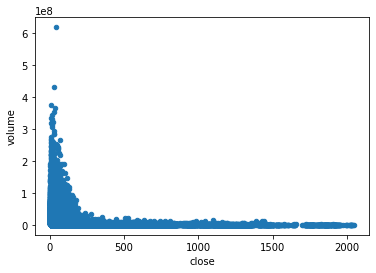

In [39]:
stocks.plot.scatter(x='close', y='volume')

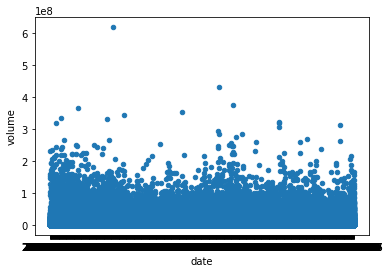

In [40]:
stocks.plot.scatter(x='date', y='volume')

## Compute daily returns

Daily returns are the relative increase/decrease on that day.

In [29]:
stocks['return'] = stocks.apply(lambda r: 1. + ((r['close'] - r['open']) / r['open']), axis=1)

In log space we get nice properties, like symmetry in the values for equally good/bad returns .

In [30]:
stocks['return_log'] = stocks.apply(lambda r: np.log(r['return']), axis=1)

Let's look at the worst and best returns of any stock during that time.
Apparently the worst was `-49.2%` and the best was `+80.5%`.

In [44]:
stocks['return'].min()-1., stocks['return'].max()-1.

(-0.492185279909065, 0.8058071390516783)

In [34]:
stocks['return_log'].min(), stocks['return_log'].max()

(-0.677638622162157, 0.5910076602845116)

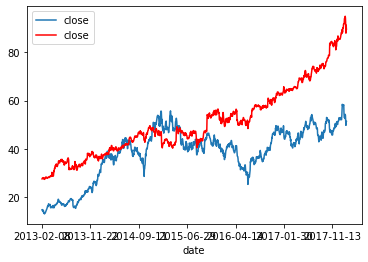

In [50]:
# gca stands for 'get current axis'
ax = plt.gca()

stocks[stocks['Name']=='AAL'].plot(kind='line', x='date', y='close', ax=ax)
stocks[stocks['Name']=='MSFT'].plot(kind='line', x='date', y='close', color='red', ax=ax)

# plt.show()

In [49]:
stocks['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [51]:
symbols = ['AAPL', 'MSFT']

AAPL         AxesSubplot(0.1,0.15;0.363636x0.75)
MSFT    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

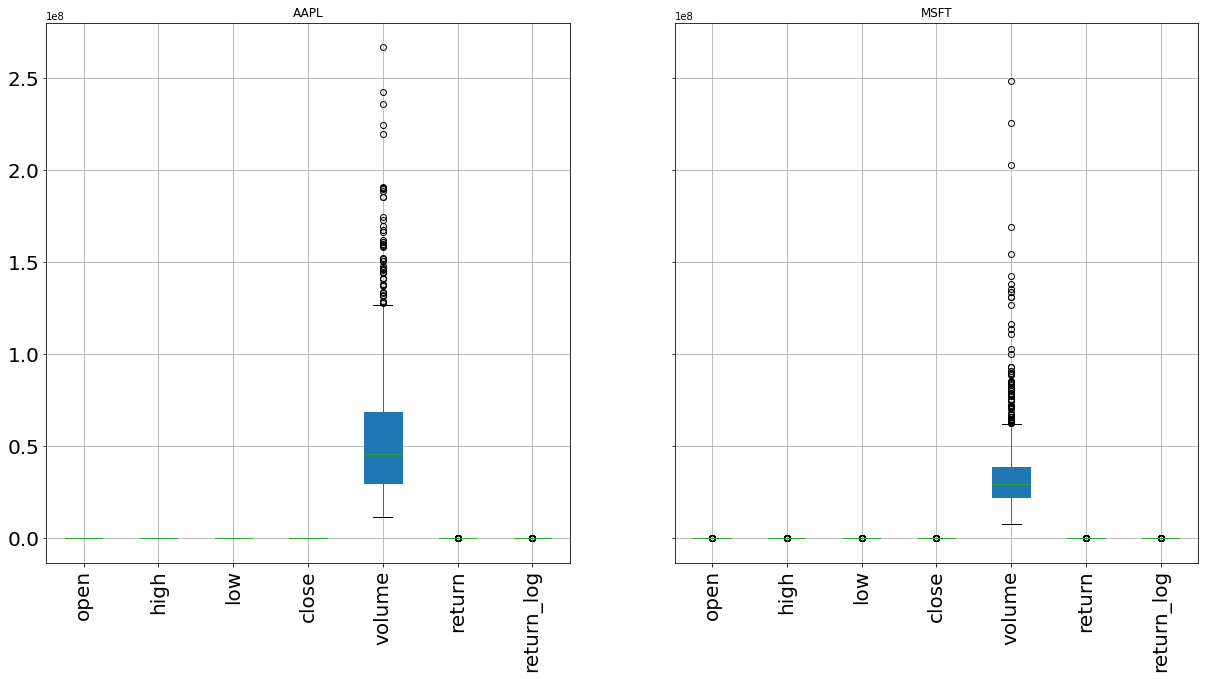

In [52]:
stocks[stocks['Name'].isin(symbols)].groupby('Name').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

In [53]:
apple = stocks[stocks['Name']=='AAPL']
apple.count()

date          1259
open          1259
high          1259
low           1259
close         1259
volume        1259
Name          1259
return        1259
return_log    1259
dtype: int64

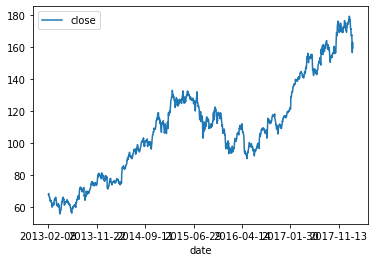

In [54]:
apple.plot(x='date', y='close')

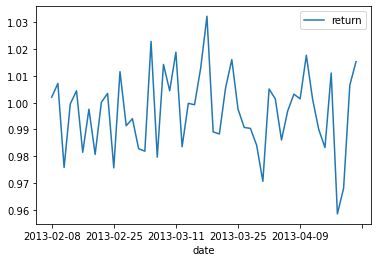

In [55]:
apple[:50].plot(x='date', y=['return'])